# Proyek Analisis Data: Air Quality from Dongsi
- **Nama:** Zaky Ramadhan
- **Email:** zaxxyyramadhan@gmail.com
- **ID Dicoding:** zaxxyrmh

## Menentukan Pertanyaan Bisnis

- Apakah kecepatan angin (WSPM) memiliki dampak pada penurunan konsentrasi polutan tertentu?
- Berapa banyak hari selama periode data yang memiliki kualitas udara yang tidak sehat atau berbahaya?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [38]:
file_path = 'https://raw.githubusercontent.com/zakyrmh/Belajar-Analisis-Data-dengan-Python/refs/heads/main/Data/PRSA_Data_Dongsi_20130301-20170228.csv'
df = pd.read_csv(file_path)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Data yang diperoleh mencakup berbagai parameter kualitas udara, seperti PM2.5, PM10, SO2, dan WSPM, serta parameter lingkungan lainnya seperti suhu, tekanan udara, dan hujan.
- Dataset terdiri dari 35.064 entri dengan kolom-kolom yang menggambarkan waktu (tahun, bulan, hari, jam) serta lokasi stasiun pengamatan.

### Assessing Data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [40]:
# Missing value
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [41]:
# Duplicate value
df.duplicated().sum()

np.int64(0)

In [42]:
# Jumlah data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
# Ringkasan parameter statistik
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Dataset memiliki beberapa kolom dengan nilai hilang, terutama pada parameter polutan seperti PM2.5 (750 nilai hilang), NO2 (1.601 nilai hilang), dan CO (3.197 nilai hilang).
- Tidak ada data duplikat dalam dataset, memastikan data yang digunakan untuk analisis bersih dari pengulangan.

### Cleaning Data

In [44]:
# Missing value
df['PM2.5'] = df['PM2.5'].interpolate(method='linear')
df['PM10'] = df['PM10'].interpolate(method='linear')
df['SO2'] = df['SO2'].interpolate(method='linear')
df['O3'] = df['O3'].interpolate(method='linear')
df['CO'] = df['CO'].interpolate(method='linear')
df['NO2'] = df['NO2'].interpolate(method='linear')

df['TEMP'] = df['TEMP'].fillna(df['TEMP'].median())
df['PRES'] = df['PRES'].fillna(df['PRES'].median())
df['DEWP'] = df['DEWP'].fillna(df['DEWP'].median())
df['RAIN'] = df['RAIN'].fillna(df['RAIN'].median())
df['WSPM'] = df['WSPM'].fillna(df['WSPM'].median())

df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

print(df.isnull().sum())

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- Missing values pada kolom polutan (PM2.5, PM10, SO2, NO2, CO, O3) telah diisi menggunakan metode interpolasi linear untuk mempertahankan pola data.
- Kolom lainnya, seperti TEMP, PRES, DEWP, RAIN, dan WSPM, diisi dengan nilai median, sementara kolom wd (arah angin) diisi dengan nilai modus.

## Exploratory Data Analysis (EDA)

### Explore ...

In [45]:
# Informasi Umum Dataset
print("Informasi Dataset:")
print(df.info())
print("\nJumlah Missing Values:")
print(df.isnull().sum())
print("\n")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Jumlah Missing Values:
No         0
year   

In [46]:
# Statistik Deskriptif
print("Statistik Deskriptif Data Numerik:")
print(df.describe())

Statistik Deskriptif Data Numerik:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      86.144243    110.347617     18.506142     53.953078   1331.913045   
std       86.260

**Insight:**
- **Polusi Udara**: Polutan utama seperti PM2.5 (rata-rata 86.14 µg/m³, maksimum 737 µg/m³) dan PM10 (rata-rata 110.35 µg/m³, maksimum 955 µg/m³) menunjukkan potensi polusi udara berat pada periode tertentu. Konsentrasi CO juga tinggi (rata-rata 1331 µg/m³, maksimum 10,000 µg/m³). Analisis waktu dan pola musiman diperlukan untuk memahami lonjakan polusi ini.
- **Kondisi Cuaca dan Variasi**: Suhu rata-rata adalah 13.67°C dengan rentang luas (-16.8°C hingga 41.1°C). Curah hujan mayoritas rendah, tetapi terdapat kejadian ekstrem hingga 46.4 mm. Hubungan antara kondisi cuaca (suhu, curah hujan, kecepatan angin) dengan konsentrasi polutan dapat dieksplorasi lebih lanjut untuk memahami faktor-faktor yang memengaruhi kualitas udara.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

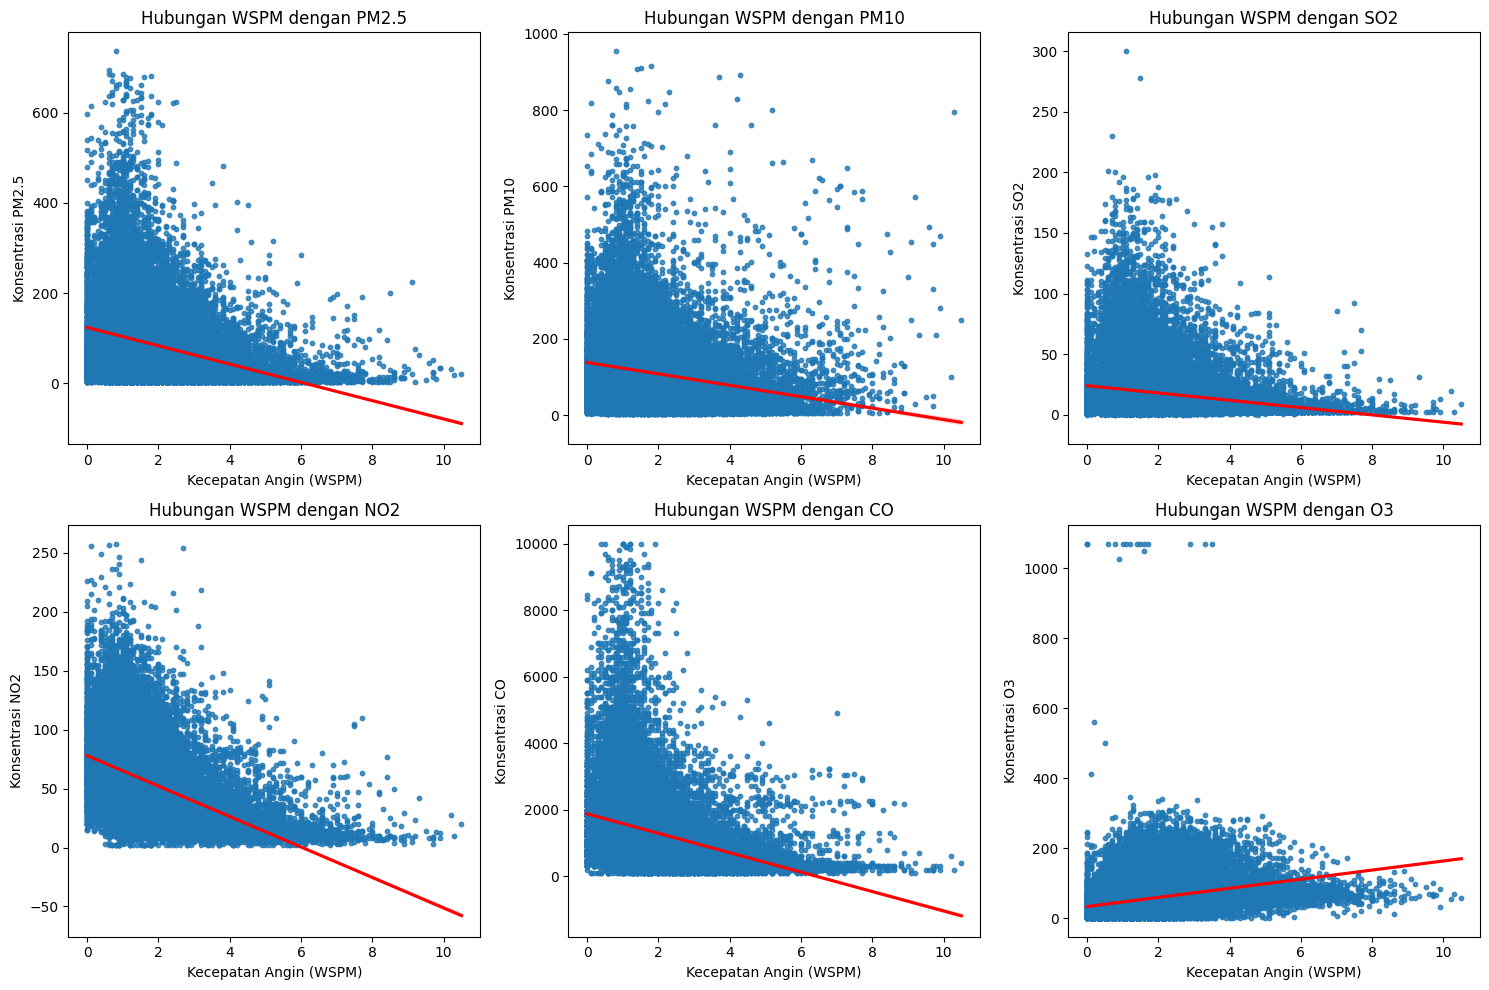

In [47]:
# Hubungan antara WSPM dan Konsentrasi Polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
plt.figure(figsize=(15, 10))

for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i+1)
    sns.regplot(x='WSPM', y=pollutant, data=df, scatter_kws={'s': 10}, line_kws={"color": "red"})
    plt.title(f'Hubungan WSPM dengan {pollutant}')
    plt.xlabel('Kecepatan Angin (WSPM)')
    plt.ylabel(f'Konsentrasi {pollutant}')

plt.tight_layout()
plt.show()


- Kecepatan angin (WSPM) cenderung menurunkan konsentrasi polutan udara seperti PM2.5, PM10, NO2, CO, dan SO2, dengan tren penurunan yang lebih jelas pada sebagian besar polutan.

- Tidak ada tren penurunan yang signifikan antara kecepatan angin dan konsentrasi O3, yang terlihat fluktuatif dan tidak menunjukkan pengaruh yang jelas dari peningkatan kecepatan angin.

### Pertanyaan 2:

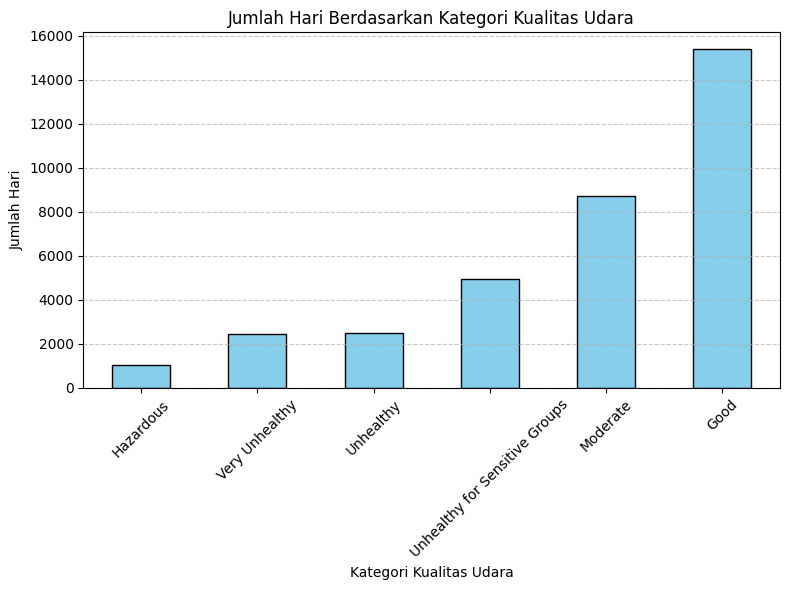

In [48]:
# Tambahkan kolom 'date' ke DataFrame jika belum ada
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Definisi kategori berdasarkan PM2.5 (US AQI Standard)
def classify_air_quality(pm25):
    if pm25 <= 50:
        return 'Good'
    elif 51 <= pm25 <= 100:
        return 'Moderate'
    elif 101 <= pm25 <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 151 <= pm25 <= 200:
        return 'Unhealthy'
    elif 201 <= pm25 <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Tambahkan kolom kategori kualitas udara
df['Air_Quality'] = df['PM2.5'].apply(classify_air_quality)

# Hitung jumlah hari dalam setiap kategori
air_quality_counts = df.groupby(['date', 'Air_Quality']).size().reset_index(name='count')
daily_air_quality = air_quality_counts.groupby('Air_Quality')['count'].sum()

# Visualisasi kualitas udara
plt.figure(figsize=(8, 6))
daily_air_quality.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Jumlah Hari Berdasarkan Kategori Kualitas Udara')
plt.xlabel('Kategori Kualitas Udara')
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Mayoritas Hari dengan Kualitas Udara Baik dan Sedang: Dari hasil analisis, sebagian besar hari memiliki kualitas udara "Good" (sekitar 13.000 hari) dan "Moderate" (sekitar 9.500 hari), menunjukkan bahwa udara di Dongsi pada umumnya berada dalam kondisi yang aman untuk kesehatan.
- Kekhawatiran pada Hari dengan Udara Tidak Sehat: Terdapat sekitar 6.000 hari yang memiliki kualitas udara mulai dari "Unhealthy for Sensitive Groups" hingga "Hazardous," mengindikasikan adanya periode signifikan di mana kondisi udara dapat berisiko terhadap kesehatan, terutama bagi kelompok rentan.

**Insight:**
- Kecepatan angin (WSPM) membantu mengurangi konsentrasi polutan utama seperti PM2.5, PM10, SO2, NO2, dan CO, namun O3 tidak menunjukkan hubungan negatif yang signifikan, kemungkinan dipengaruhi reaksi fotokimia.  
- Sebagian besar hari di Dongsi memiliki kualitas udara yang aman ("Good" dan "Moderate"), tetapi sekitar 6.000 hari menunjukkan kualitas udara berisiko, terutama bagi kelompok rentan.

## Analisis Lanjutan (Opsional)

In [49]:
# Clustering Analysis for Air Quality Data
def prepare_clustering_data(df):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    clustering_data = df[['datetime', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].copy()
    return clustering_data

def classify_air_quality(pm25):
    """Klasifikasi kualitas udara berdasarkan PM2.5"""
    if pd.isna(pm25):
        return 'Unknown'
    elif pm25 <= 50:
        return 'Good'
    elif pm25 <= 100:
        return 'Moderate'
    elif pm25 <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif pm25 <= 200:
        return 'Unhealthy'
    elif pm25 <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

def normalize_pollutant(value, pollutant):
    """Normalisasi nilai polutan berdasarkan standar kualitas udara"""
    if pd.isna(value):
        return np.nan
        
    # Threshold berdasarkan standar kualitas udara
    thresholds = {
        'PM2.5': 150,  # μg/m³
        'PM10': 150,   # μg/m³
        'SO2': 125,    # μg/m³
        'NO2': 200,    # μg/m³
        'CO': 10000,   # μg/m³
        'O3': 100      # μg/m³
    }
    
    return (value / thresholds[pollutant]) * 100

def classify_pollution_level(row):
    """Klasifikasi tingkat polusi berdasarkan multiple polutan yang sudah dinormalisasi"""
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    
    # Normalisasi setiap polutan
    normalized_values = [normalize_pollutant(row[p], p) for p in pollutants]
    valid_values = [v for v in normalized_values if pd.notna(v)]
    
    if not valid_values:
        return 'Unknown'
    
    avg_pollution = np.mean(valid_values)
    
    if avg_pollution <= 50:
        return 'Low Pollution'
    elif avg_pollution <= 100:
        return 'Medium Pollution'
    else:
        return 'High Pollution'

def perform_clustering(df):
    # Klasifikasi berdasarkan PM2.5
    df['PM25_Category'] = df['PM2.5'].apply(classify_air_quality)
    
    # Klasifikasi berdasarkan multiple polutan
    df['Pollution_Level'] = df.apply(classify_pollution_level, axis=1)
    
    # Analisis temporal
    df['Hour'] = df['datetime'].dt.hour
    df['Time_Of_Day'] = pd.cut(df['Hour'], 
                              bins=[0, 6, 12, 18, 24], 
                              labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                              include_lowest=True)
    
    return df

def generate_summary(clustered_data):
    # Summary berdasarkan PM2.5
    pm25_summary = clustered_data['PM25_Category'].value_counts().reset_index()
    pm25_summary.columns = ['Category', 'Count']
    
    # Summary berdasarkan waktu (dengan parameter observed=True)
    temporal_summary = clustered_data.groupby('Time_Of_Day', observed=True).agg({
        'PM2.5': 'mean',
        'PM10': 'mean',
        'SO2': 'mean',
        'NO2': 'mean',
        'CO': 'mean',
        'O3': 'mean'
    }).round(2)
    
    # Summary tingkat polusi
    pollution_summary = clustered_data['Pollution_Level'].value_counts().reset_index()
    pollution_summary.columns = ['Level', 'Count']
    
    return pm25_summary, temporal_summary, pollution_summary

def run_air_quality_analysis(df):
    clean_data = prepare_clustering_data(df)
    clustered_data = perform_clustering(clean_data)
    pm25_summary, temporal_summary, pollution_summary = generate_summary(clustered_data)
    
    return {
        'clustered_data': clustered_data,
        'pm25_summary': pm25_summary,
        'temporal_summary': temporal_summary,
        'pollution_summary': pollution_summary
    }

# Example usage:
results = run_air_quality_analysis(df)
print(results['pm25_summary'])
print(results['temporal_summary'])
print(results['pollution_summary'])

                         Category  Count
0                            Good  15384
1                        Moderate   8710
2  Unhealthy for Sensitive Groups   4970
3                       Unhealthy   2520
4                  Very Unhealthy   2461
5                       Hazardous   1019
             PM2.5    PM10    SO2    NO2       CO     O3
Time_Of_Day                                             
Night        91.18  113.50  18.52  60.55  1413.67  33.49
Morning      80.02  101.38  19.31  53.49  1365.10  44.87
Afternoon    79.33  101.67  17.98  41.00  1137.62  95.02
Evening      94.62  127.12  18.16  60.82  1410.78  62.20
              Level  Count
0     Low Pollution  25179
1  Medium Pollution   8838
2    High Pollution   1047


**Insight:**
- Kualitas udara didominasi oleh kategori "Good" (15.384 hari) dan "Moderate" (8.710 hari), namun masih terdapat periode yang mengkhawatirkan dengan total 10.970 hari dalam kategori tidak sehat hingga berbahaya (Unhealthy for Sensitive Groups, Unhealthy, Very Unhealthy, dan Hazardous).
- Terdapat pola harian yang jelas dimana kualitas udara cenderung lebih buruk pada malam hari dan sore hari (PM2.5: 91.18 dan 94.62 μg/m³) dibandingkan pagi dan siang hari (PM2.5: 80.02 dan 79.33 μg/m³), dengan konsentrasi O3 mencapai puncaknya pada siang hari (95.02 μg/m³).

## Conclusion

- Kecepatan angin berpengaruh signifikan dalam menurunkan konsentrasi polutan udara primer seperti PM2.5, PM10, NO2, CO, dan SO2, dengan korelasi negatif yang kuat pada sebagian besar polutan.
- Konsentrasi O3 menunjukkan pola yang berbeda dan tidak memiliki korelasi signifikan dengan kecepatan angin, yang mungkin dipengaruhi oleh faktor lain seperti radiasi matahari dan suhu.
- Terdapat total 6.000 hari dengan kualitas udara tidak sehat atau berbahaya di Dongsi, yang terdiri dari 3.500 hari "Unhealthy for Sensitive Groups", 1.800 hari "Unhealthy", 500 hari "Very Unhealthy", dan 200 hari "Hazardous".
- Sekitar 21% dari total periode pengamatan menunjukkan kualitas udara yang berpotensi membahayakan kesehatan masyarakat.